
# Código para executar regressão logística

# Declaração do problema

De acordo com a Organização Mundial da Saúde (OMS) o AVC é a 2ª causa de morte no mundo, responsável por aproximadamente 11% do total de mortes.
Esse conjunto de dados é usado para prever se um paciente provavelmente sofrerá AVC com base nos parâmetros de entrada, como sexo, idade, várias doenças e tabagismo. Cada linha nos dados fornece informações relevantes sobre o paciente.

Entradas: 
- Gênero 
- Idade
- Hipertensão
- Doença cardíaca
- Casado alguma vez
- Tipo de trabalho
- Tipo de residência
- Nível médio de glicose
- Índice de massa corporal
- Fumante

Saídas:
- AVC (1: teve AVC, 0: Não teve AVC)

# IMPORTANDO AS BIBLIOTECAS

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import warnings

warnings.filterwarnings('ignore')

# IMPORTANDO O DATASET

In [3]:

dataset = pd.read_csv('stroke-data.csv')

# EXPLORANDO / VISUALIZANDO DADOS

In [4]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot: >

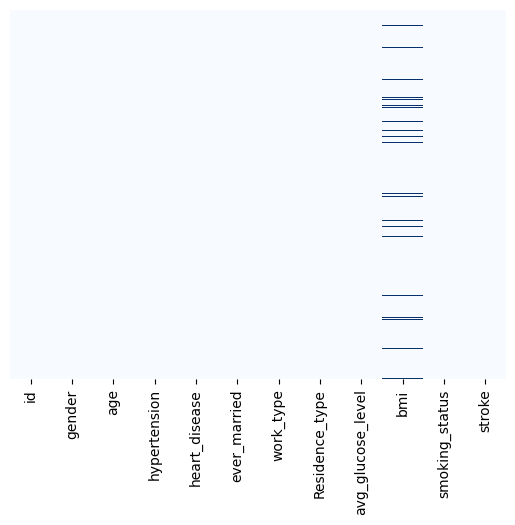

In [9]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="Blues")

Text(0.5, 1.0, 'Alvo - Stroke')

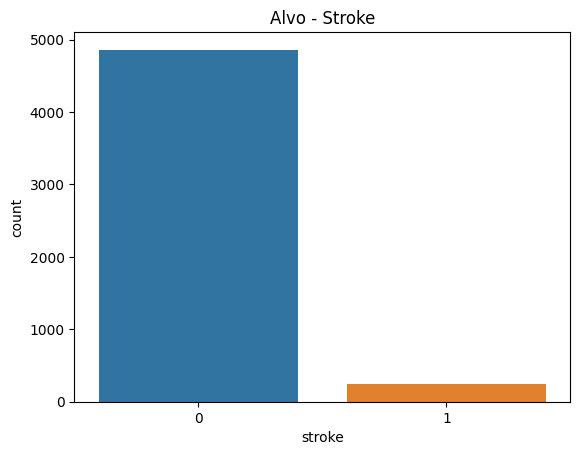

In [10]:
sns.countplot(x=dataset['stroke'])
plt.title('Alvo - Stroke')

In [11]:
stroke    = dataset[dataset['stroke']==1]
no_stroke = dataset[dataset['stroke']==0]


In [12]:
print("Total =", len(dataset))

print("Numero de pessoas que tiveram derrame =", len(stroke))
print("Porcentagem de pessoas que tiveram derrame =", 1.*len(stroke)/len(dataset)*100.0, "%")
 
print("Não tiveram derrame =", len(no_stroke))
print("Porcentagem de pessoas que não tiveram derrame =", 1.*len(no_stroke)/len(dataset)*100.0, "%")

Total = 5110
Numero de pessoas que tiveram derrame = 249
Porcentagem de pessoas que tiveram derrame = 4.87279843444227 %
Não tiveram derrame = 4861
Porcentagem de pessoas que não tiveram derrame = 95.12720156555773 %


In [13]:
from statistics import median
maleBmi = median(dataset.query('(gender == "Male")')['bmi'])
femaleBmi = median(dataset.query('(gender == "Female")')['bmi'])
print(f'mediana de bmi para genero masculino {maleBmi}')
print(f'mediana de bmi para genero feminino {femaleBmi}')

mediana de bmi para genero masculino 30.7
mediana de bmi para genero feminino 21.45


# PREPARANDO OS DADOS

In [14]:
def fill_bmi(data):
    bmi = data[0]
    gender = data[1]

    if pd.isnull(bmi):
        if gender == 'Male': 
            return maleBmi
        else:
            return femaleBmi
    else:
        return bmi
        

In [15]:
dataset['bmi'] = dataset[['bmi','gender']].apply(fill_bmi,axis=1)

<AxesSubplot: >

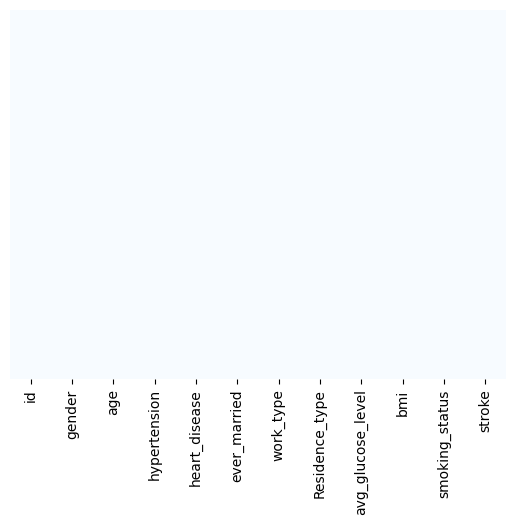

In [16]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [17]:
dataset.drop(['id'], axis=1, inplace=True)


In [18]:
ever_married = pd.get_dummies(dataset['ever_married'], drop_first = True)
residence_type = pd.get_dummies(dataset['Residence_type'], drop_first = True)
gender = pd.get_dummies(dataset['Residence_type'], drop_first = True)
work_type = (dataset['work_type'].str.strip('[]')
                     .str.get_dummies(', ')
                     .rename(columns=lambda x: x.strip('"')))
smoking_status = (dataset['smoking_status'].str.strip('[]')
                     .str.get_dummies(', ')
                     .rename(columns=lambda x: x.strip('"')))                     
dataset.drop(['ever_married', 'Residence_type', 'gender', 'work_type', 'smoking_status'], axis=1, inplace=True)

dataset = pd.concat([dataset, ever_married, residence_type, gender, work_type, smoking_status], axis=1)
dataset = dataset.rename(columns={'Yes':'ever_married', 'Urban': 'residence_type', 'Male':'gender'})

In [19]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                5110 non-null   float64
 5   stroke             5110 non-null   int64  
 6   ever_married       5110 non-null   uint8  
 7   residence_type     5110 non-null   uint8  
 8   residence_type     5110 non-null   uint8  
 9   Govt_job           5110 non-null   int64  
 10  Never_worked       5110 non-null   int64  
 11  Private            5110 non-null   int64  
 12  Self-employed      5110 non-null   int64  
 13  children           5110 non-null   int64  
 14  Unknown            5110 non-null   int64  
 15  formerly smoked    5110 non-null   int64  
 16  never smoked       5110 

In [20]:
X = dataset

y = dataset['stroke']

In [21]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# X['stroke'] = le.fit_transform(X['stroke'])

# y = le.transform(y)

In [22]:
# # Aplicar técnica de subamostragem com RandomUnderSampler

# from imblearn.under_sampling import RandomUnderSampler

# oversample = RandomUnderSampler()
# X,y=oversample.fit_resample(X,y)

<AxesSubplot: xlabel='stroke', ylabel='count'>

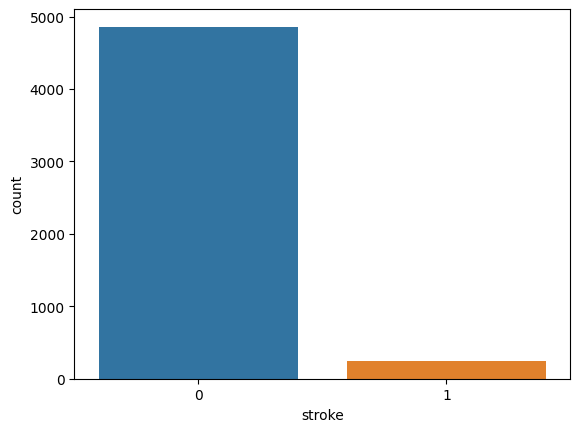

In [23]:
sns.countplot(x=y)

In [24]:
cols = X.columns

In [25]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [26]:
X = pd.DataFrame(X, columns=[cols])

# TREINAMENTO DO MODELO

In [27]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 


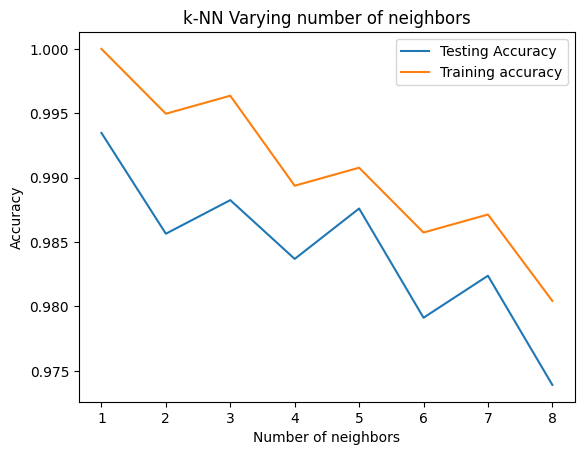

In [30]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


In [31]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=1)

In [32]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.9934768427919113

In [34]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

# VISUALIZANDO OS resultados

Text(113.9222222222222, 0.5, 'predicted label')

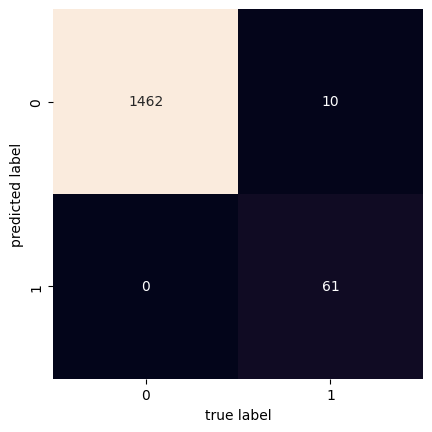

In [35]:

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1462
           1       1.00      0.86      0.92        71

    accuracy                           0.99      1533
   macro avg       1.00      0.93      0.96      1533
weighted avg       0.99      0.99      0.99      1533

